In [1]:
import pandas as pd
from wordcloud import WordCloud,ImageColorGenerator
import imageio
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [2]:
# 用户自定义禁用词汇
def remove_words(df):
    stop_words = input('请设置非禁用词汇(采用"，"分隔）：').split(',')
    for stop_word in stop_words:
        df.replace(stop_word,'nan')
    return df

In [3]:
# 词云绘制，设计词云形状
def creat_wordcloud(f):
    # 分词
    cut_text = word_tokenize(f)
    cut_text = " ".join(cut_text)
    # 用菜篮子图片作为词云形状
    mk = imageio.imread('market.png')
    w = WordCloud(width = 2000,
                  height = 1200,
                  background_color = 'white',
                  font_path = "/System/Library/Fonts/Arial Bold.ttf",
                  mask = mk)
    wordcloud = w.generate(cut_text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    # 不显示坐标轴
    plt.axis("off")
    plt.show()
    # 存储词云图片
    wordcloud.to_file('outpu01.png')

In [4]:
# 数据导入并处理
df = pd.read_csv('Market_Basket_Optimisation.csv',
                 header=None)
remove_words(df)
f = ''
item_count = {}
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        item = str(df[i][j])
        if item != 'nan':
            f = f + ' '+item
            if item not in item_count:
                item_count[item] = 1
            else:
                item_count[item] += 1

请设置非禁用词汇(采用"，"分隔）：and,or


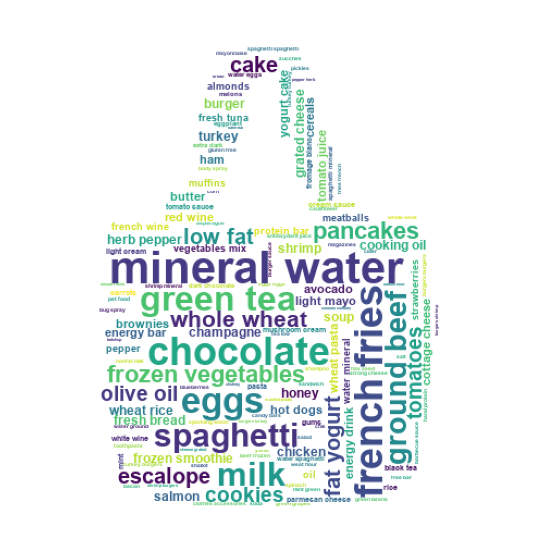

In [5]:
creat_wordcloud(f)

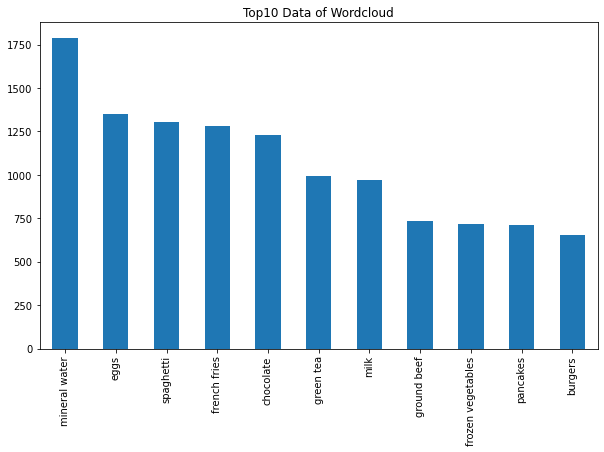

In [16]:
# 绘制词汇频率top10 柱状图
s1 = pd.Series(item_count).sort_values(ascending=False)[:11]
plt.figure(figsize=(10,6))
s1.plot(kind = 'bar')
plt.title('Top10 Data of Wordcloud')
plt.show()